* Competition link https://www.kaggle.com/c/house-prices-advanced-regression-techniques
* Useful reference https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

In [1]:
import helpers as helpers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
ls

README.md                       data/
Robin kaggle house price.ipynb  helpers.py
__pycache__/                    results.csv


In [3]:
train = pd.read_csv("data/train.csv", keep_default_na=False, index_col=0) # Nothing treated as NA
print(train.shape)
len(list(train.columns))

(1460, 80)


80

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


## Data exploration

Descriptions of the data tags are in a seperate text file, but lets put that info in a dictionary

In [5]:
description = {col:helpers.get_info(col) for col in train.columns}  # Cerate the description dict

In [6]:
description

{'1stFlrSF': ' First Floor square feet',
 '2ndFlrSF': ' Second floor square feet',
 '3SsnPorch': ' Three season porch area in square feet',
 'Alley': ' Type of alley access to property',
 'BedroomAbvGr': None,
 'BldgType': ' Type of dwelling',
 'BsmtCond': ' Evaluates the general condition of the basement',
 'BsmtExposure': ' Refers to walkout or garden level walls',
 'BsmtFinSF1': ' Type 1 finished square feet',
 'BsmtFinSF2': ' Type 2 finished square feet',
 'BsmtFinType1': ' Rating of basement finished area',
 'BsmtFinType2': ' Rating of basement finished area (if multiple types)',
 'BsmtFullBath': ' Basement full bathrooms',
 'BsmtHalfBath': ' Basement half bathrooms',
 'BsmtQual': ' Evaluates the height of the basement',
 'BsmtUnfSF': ' Unfinished square feet of basement area',
 'CentralAir': ' Central air conditioning',
 'Condition1': ' Proximity to various conditions',
 'Condition2': ' Proximity to various conditions (if more than one is present)',
 'Electrical': ' Electrical sy

Print out a description

In [7]:
desc = train.columns[0]
print("{} : {}".format(desc, description[desc]))

MSSubClass :  Identifies the type of dwelling involved in the sale.


Look at categoricals

In [8]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

## Correlations
Lets look for the ten most positive correlations

In [9]:
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)[0:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

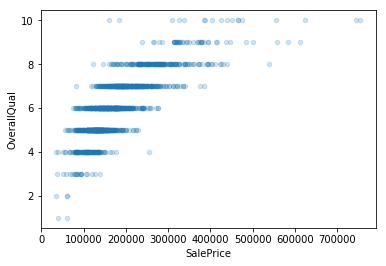

In [10]:
train.plot(kind="scatter", x="SalePrice", y="OverallQual", alpha=0.2)
plt.show()

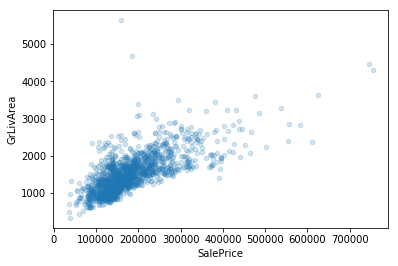

In [11]:
train.plot(kind="scatter", x="SalePrice", y="GrLivArea", alpha=0.2)
plt.show()

## Feature engineering
To do

# Lets start some sklearn
Lets get the labels and convert categoricals to numerical with get_dummies

In [12]:
train_labels = train["SalePrice"].copy()  # Get the labels
train.drop(columns=["SalePrice"], inplace=True) # drop labels for training set
print(train.shape)

train_prepared = pd.get_dummies(train)
len(list(train_prepared.columns))

(1460, 79)


838

After get_dummies have 838 cols

In [13]:
%%time
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels) # X and Y

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


CPU times: user 1.25 s, sys: 43.1 ms, total: 1.3 s
Wall time: 1.15 s


Calculate the rmse error

In [14]:
train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
RMSE = int(lin_rmse)
RMSE

11714

Lets compare this to the mean price

In [15]:
MEAN_PRICE = int(train_labels.mean())
MEAN_PRICE

180921

In [16]:
error = 100*(RMSE/MEAN_PRICE)
print("mean error is {}%".format(int(error)))

mean error is 6%


## Test
Apply model to test.csv

In [18]:
test = pd.read_csv("data/test.csv", keep_default_na=False, index_col=0)
print(test.shape)
len(list(test.columns))

(1459, 79)


79

Test data has 1 fewer col than train since it is missing SalePrice

In [21]:
test_prepared = pd.get_dummies(test)
print(test_prepared.shape)
len(list(test_prepared.columns))

(1459, 3638)


3638

In [24]:
list(train_prepared.columns)

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotFrontage_100',
 'LotFrontage_101',
 'LotFrontage_102',
 'LotFrontage_103',
 'LotFrontage_104',
 'LotFrontage_105',
 'LotFrontage_106',
 'LotFrontage_107',
 'LotFrontage_108',
 'LotFrontage_109',
 'LotFrontage_110',
 'LotFrontage_111',
 'LotFrontage_112',
 'LotFrontage_114',
 'LotFrontage_115',
 'LotFrontage_116',
 'LotFrontage_118',
 'LotFrontage_120',
 'LotFrontage_121',
 'LotFrontage_122',
 'LotFrontage_124',
 'LotF

In [23]:
test_prepared[list(train_prepared.columns)]

TypeError: unhashable type: 'list'

I'm not sure why get_dummies is returning so many columns for the test data..

In [21]:
test_predictions = lin_reg.predict(test_prepared)

ValueError: shapes (1459,3638) and (838,) not aligned: 3638 (dim 1) != 838 (dim 0)

In [ ]:
testing_predictions

In [ ]:
results_df = pd.DataFrame(testing_predictions)

In [ ]:
results_df.index = testing.index

In [ ]:
results_df.head()

In [ ]:
results_df.columns = ['SalePrice']

In [ ]:
results_df.to_csv("results.csv")

In [ ]:
results_df.shape